In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Clean Up
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[df['job_country']=='United States']
df_skills = df_US.explode('job_skills')
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending= False, inplace= True)

job_titles = sorted(df_skills_count['job_title_short'].unique().tolist()[:3])

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']== job_title].head(5)
    df_plot.plot(kind= 'barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize= 15)
fig.tight_layout(h_pad=1.2)
plt.show()

In [13]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [ ]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_perc['skill_percent'] = 100 * (df_skills_perc['skill_count'] / df_skills_perc['jobs_total'])

df_skills_perc

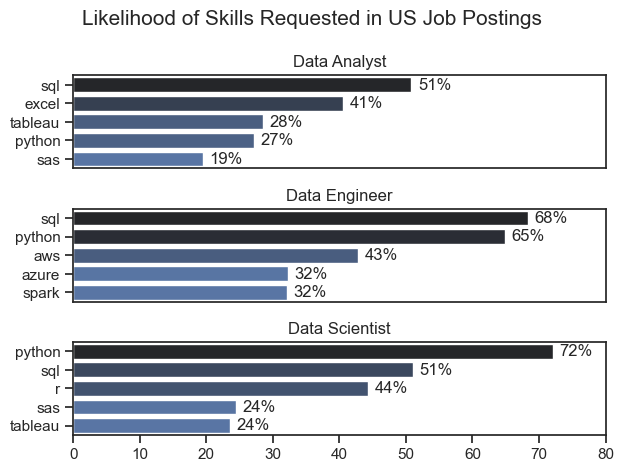

In [42]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short']== job_title].head(5)
    #df_plot.plot(kind= 'barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0,80)

    for ind, val in enumerate(df_plot['skill_percent']):
        ax[i].text(val+1, ind, f'{val:.0f}%', va='center')
    if i != len(job_titles)-1:
        ax[i].set_xticks([])


fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize= 15)
fig.tight_layout(h_pad=1.2)
plt.show()